# Online Learning

## DavisSML: Lecture 8

## Prof. James Sharpnack

### Online Learning

Data is streaming, and we need to predict the new points sequentially

For each t:
- $x_t$ is revealed
- learner predicts $\hat y_t$
- $y_t$ is revealed and loss $\ell(\hat y_t,y_t)$ is incurred
- learner updates parameters based on the experience

### Naive "batch" method

For each t:
- Learner fits on $\{x_i,y_i\}_{i=1}^{t-1}$
- Learner predicts $\hat y_t$ from $x_t$

If complexity of fit is $O(A_t)$ time then overall takes 
$$
O\left(\sum_{t=1}^T A_t\right)
$$
time, for $A_t = t$ (linear time) then $O(\sum_{t=1}^T A_t) = O(T^2)$

### Recall Risk and Empirical Risk

Given a loss $\ell(\theta; X,Y)$, for parameters $\theta$, the *risk* is 
$$
R(\theta) = \mathbb E \ell(\theta; X,Y).
$$

And given training data $\{x_i,y_i\}_{i=1}^{n}$ (drawn iid to $X,Y$), then the *empirical risk* is
$$
R_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta; x_i, y_i).
$$
Notice that $\mathbb E R_n(\theta) = R(\theta)$ for fixed $\theta$.

For a class of parameters $\Theta$, the *empirical risk minimizer (ERM)* is the 
$$
\hat \theta = \arg \min_{\theta \in \Theta} R_n(\theta)
$$
(may not be unique).

### Ideal gradient descent

Suitable for uncontrained/regularized form.  Risk is 
$$
R(\theta) = \mathbb E \ell(\theta; X,Y).
$$

Suppose that we had access to $R(\theta)$ the true risk.  Then to minimize $R$ we could do gradient descent,
$$
\theta \gets \theta - \eta \nabla R(\theta)
$$
To do this we only need access to $\nabla R(\theta)$

### ERM for convex opt

Gradient for empirical risk:
$$
\nabla R_n(\theta) = \frac 1n \sum_{i=1}^n \nabla \ell(\theta; x_i, y_i)
$$
and 
$$
\mathbb E \nabla \ell(\theta; x_i, y_i) = \nabla \mathbb E \ell(\theta; x_i, y_i) = \nabla R(\theta)
$$
So, gradient descent for ERM moves $\theta$ in direction of $- \nabla R_n(\theta)$ 
$$
\theta \gets \theta - \eta \nabla R_n(\theta)
$$
where
$$
\mathbb E \nabla R_n(\theta) = \nabla R(\theta)
$$

### Minibatch gradient descent

A *minibatch* is a random subsample of data $(x_1,y_1), \ldots, (x_m,y_m)$ in the full training data.
Then the minibatch gradient is
$$
\nabla R_m(\theta) = \frac 1m \sum_{i=1}^m \nabla \ell(\theta; x_i, y_i)
$$
we also have that 
$$
\mathbb E \nabla R_m(\theta) = \nabla R(\theta)
$$
the downside is that $R_m(\theta)$ is noisier.

### Stochastic gradient descent

Assumes that $(x_t,y_t)$ are drawn iid from some population.  SGD uses a minibatch size of $m=1$.


For each t:
- $x_t$ is revealed
- learner predicts $\hat y_t$ with $f_\theta$
- $y_t$ is revealed and loss $\ell(\hat y_t,y_t)$ is incurred
- learner updates parameters with update,
$$
\theta \gets \theta - \eta \nabla \ell(\theta; x_t,y_t)
$$

- **Loss**: $$\ell(\hat y_i,y_i) = \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i \right)^2$$

- **Gradient**: $$\frac{\partial}{\partial \beta_j} \ell(\hat y_i,y_i) = 2 \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right) x_{i,j}  = \delta_i x_{i,j}$$
$$\frac{\partial}{\partial \beta_0} \ell(\hat y_i,y_i) = 2 \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right)  = \delta_i$$
$$ \delta_i = 2 \left(\hat y_i - y_i \right)$$

- **Update**: $$\beta \gets \beta - \eta \delta_i x_i$$
$$\beta_0 \gets \beta_0 - \eta \delta_i$$

### Exercise 8.1

1. Suppose $t$ is drawn uniformly at random from $1,\ldots,n$.  What is $\mathbb E_t \nabla \ell(\theta; x_t, y_t)$ where the expectation is taken only with respect to the random draw of $t$?

2. For the cell above, let $\beta, \beta_0$ be fixed.  Suppose that $y_i = \beta_0^* + x_i^\top \beta^* + \epsilon_i$ where $\epsilon_i$ is zero mean and independent of $x_i$ (this is called exogeneity).  What is the expected gradients for a random draw of $x_i,y_i$,
$$ \mathbb E \delta_i x_i = ?$$
$$ \mathbb E \delta_i = ?$$
Try to get these expressions as reduced as possible.

### Exercise 8.1 Answers

1. $$ \mathbb E_t \nabla \ell(\theta; x_t, y_t) = \frac 1n \sum_{i=1}^n \nabla \ell(\theta; x_i, y_i) = \nabla R_n(\theta)$$

2. Because $\hat y_i = \beta_0 + \beta^\top x_i$, $$\mathbb E \delta_i = 2 \mathbb E (\beta_0 + \beta^\top x_i - y_i) = 2 (\beta - \beta^*)^\top \mathbb E [x_i] + 2(\beta_0 - \beta_0^*).$$
Also,
$$ \delta_i x_i = 2(\beta_0 + \beta^\top x_i - y_i) x_i = 2(\beta_0 - \beta_0^* + \beta^\top x_i - \beta^{*,\top} x_i - \epsilon_i) x_i$$
So,
$$ \mathbb E \delta_i x_i = 2 \mathbb E (\beta_0 - \beta_0^* + \beta^\top x_i - \beta^{*,\top} x_i) x_i + 2 \mathbb E \epsilon_i x_i = 2 \left( \mathbb E [x_i x_i^\top] (\beta - \beta^*) + (\beta_0 - \beta_0^*) \mathbb E [x_i] \right)$$
by the exogeneity.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
## open wine data
wine = pd.read_csv('../../data/winequality-red.csv',delimiter=';')
Y = wine.values[:,-1]
X = wine.values[:,:-1]
n,p = X.shape

X = n**0.5 * (X - X.mean(axis=0)) / X.std(axis=0)

In [11]:
## Look at LROnline.py

from LROnline import *

learner = LROnline(p,loss='sqr',decay=-1.)

In [12]:
help(learner.update_beta) # why we do docstrings

Help on method update_beta in module LROnline:

update_beta(x, y) method of LROnline.LROnline instance
    single step update, output loss
    args: x,y



In [13]:
yx_it = zip(Y,X) # iterator giving data
y,x = next(yx_it) # first datum
learner.beta, y, x # init beta, first datum

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 5.0,
 array([-21.12777894,  38.46304151, -55.64149498, -18.12307015,
         -9.74522065, -18.64187237, -15.16056766,  22.32399898,
         51.52960611, -23.16101967, -38.39783932]))

In [14]:
learner.update_beta(x,y) # return loss

25.0

In [15]:
learner.beta, y, x # new beta, first datum

(array([-211.27778942,  384.63041512, -556.41494984, -181.23070154,
         -97.45220654, -186.41872368, -151.60567657,  223.2399898 ,
         515.29606114, -231.61019672, -383.97839323]),
 5.0,
 array([-21.12777894,  38.46304151, -55.64149498, -18.12307015,
         -9.74522065, -18.64187237, -15.16056766,  22.32399898,
         51.52960611, -23.16101967, -38.39783932]))

In [16]:
losses = [learner.update_beta(x,y) for y,x in yx_it] # run online learning

/home/jsharpna/Documents/DavisSML/lectures/lecture8/LROnline.py:61: RuntimeWarning: overflow encountered in double_scalars
  return (yhat - y)**2.


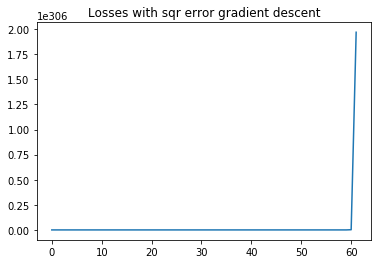

In [19]:
plt.plot(losses)
_ = plt.title('Losses with sqr error gradient descent')

- **Loss**: $$\ell(\hat y_i,y_i) = \left| \beta_0 + \sum_j \beta_j x_{i,j} - y_i \right|$$

- **(sub-)Gradient**: $$\frac{\partial}{\partial \beta_j} \ell(\hat y_i,y_i) = {\rm sign} \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right) x_{i,j}  = \delta_i x_{i,j}$$
$$\frac{\partial}{\partial \beta_0} \ell(\hat y_i,y_i) = {\rm sign} \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right)  = \delta_i$$
$$ \delta_i = {\rm sign} \left(\hat y_i - y_i \right)$$

- **Update**: $$\beta \gets \beta - \eta \delta_i x_i$$
$$\beta_0 \gets \beta_0 - \eta \delta_i$$

In [22]:
learner = LROnline(p,loss='abs',decay=-1.)
losses = [learner.update_beta(x,y) for y,x in zip(Y,X)]

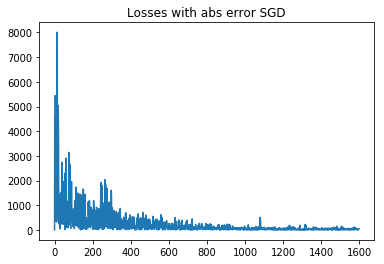

In [24]:
plt.plot(losses)
_ = plt.title('Losses with abs error SGD')

### Exercise 8.2

Look at `LROnline.py` and determine what the decay argument is doing.  Play with the arguments and see when you achieve convergence and when you do not.

### Perceptron

Recall SVM for $y_i \in \{-1,1\}$,
$$
\min_\theta \frac 1n \sum_i (1 - y_i x_i^\top \theta)_+ + \lambda \| \theta \|^2.
$$

Then subdifferential of $(1 - y x^\top\theta)_+$ is

$\{- y x\}$ if $1 - y x^\top \theta > 0$

$[0,-yx]$ if $1 - y x^\top \theta = 0$

$\{0\}$ if $1 - y x^\top \theta < 0$

Choose subgradient $0$ when we can.

### Perceptron

Our subgradient of $\ell(\theta; x, y) = (1 - y x^\top\theta)_+ + \lambda \| \theta \|^2$ is 

$-yx + \lambda \theta$ if $1 - y x^\top \theta > 0$

$\lambda \theta$ otherwise

SGD makes update
$$
\theta \gets (1 - \lambda \eta) \theta + \eta y_t x_t  1\{1 - y x^\top \theta > 0\}
$$

### Perceptron

Recall that as $\lambda \rightarrow 0$ the margin is more narrow, equivalent to reducing 1 in $1 - y x^\top \theta < 0$.
In the limit as $\lambda \rightarrow 0$ and with $\eta = 1$, 
$$
\theta \gets \theta + y_t x_t  1\{y x^\top \theta \le 0\}
$$
which is Rosenblatt's perceptron.

The update for the intercept is simpler
$$
\theta_0 \gets \theta_0 + y_t 1\{y x^\top \theta \le 0\}
$$

In [ ]:
 class Perceptron:
    """
    Rosenblatt's perceptron, online learner

    Attributes:
        eta: learning rate
        beta: coefficient vector
        p: dimension of X
        beta_zero: intercept
    """

    def __init__(self,eta,dim,
                 beta_init=None,beta_zero_init=None):
        """initialize and set beta"""
        self.eta = eta
        self.p = dim
        if beta_init:
            self.beta = beta_init
        else:
            self.beta = np.zeros(dim)
        if beta_zero_init:
            self.beta_zero = beta_zero_init
        else:
            self.beta_zero = 0.
    ...

In [ ]:
 class Perceptron:
    ...

    def predict(self,x):
        """predict y with x"""
        s = x @ self.beta + self.beta_zero
        yhat = 2*(s > 0) - 1
        return yhat

    def update_beta(self,x,y):
        """single step update output 0/1 loss"""
        yhat = self.predict(x)
        if yhat != y:
            self.beta += self.eta * y * x
            self.beta_zero += self.eta * y 
        return yhat != y

In [ ]:
loss = []
t_iter = 40
for t,(x,y) in enumerate(zip(X,Y)):
    loss.append(perc.update_beta(x,y))

![](perc_0.png)

![](perc_1.png)

![](perc_2.png)

![](perc_3.png)

![](perc_4.png)

### Exercise 8.3

Look at `Perceptron.py` and go through each line in the main code section after `if __name__=="__main__":`.  Look up at the main class and the helper functions to get a good understanding of what is happening there.